Author: Emre Bozkurt

In [6]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from graph import Graph, is_connected

In [7]:
# Copy of Yashasvi's random graph generator
def create_random_graph(i, j):
    """
    Returns a Graph with i nodes and j edges.
    Ensures no 'multiples' (duplicate edges).
    """
    max_possible_edges = i * (i - 1) // 2
    j = min(j, max_possible_edges) # Safety cap

    G = Graph(i)
    
    # Generate all possible unique edge pairs
    all_possible_edges = []
    for u in range(i):
        for v in range(u + 1, i):
            all_possible_edges.append((u, v))
            
    # Randomly select j edges
    selected_edges = random.sample(all_possible_edges, j)
    
    for u, v in selected_edges:
        G.add_edge(u, v)
        
    return G

In [13]:
def run_connectivity_experiment(n=100, trials=200, j_values=None):
    """
    Fix n, sweep j, estimate P(connected) by Monte Carlo.
    """
    max_edges = n * (n - 1) // 2

    if j_values is None:
        # A sensible sweep: from 0 up to ~2n with more resolution around ~n log n
        # (connectivity transition tends to happen in that neighborhood)
        center = int(n * np.log(n))
        low = 0
        high = min(max_edges, int(2.0 * center))

        # Use more points near the transition:
        j_values = np.unique(np.concatenate([
            np.linspace(low, int(0.6 * center), 10, dtype=int),
            np.linspace(int(0.6 * center), int(1.4 * center), 15, dtype=int),
            np.linspace(int(1.4 * center), high, 10, dtype=int),
        ]))

    probs = []
    for j in j_values:
        connected_count = 0
        for _ in range(trials):
            G = create_random_graph(n, int(j))
            if is_connected(G):
                connected_count += 1
        probs.append(connected_count / trials)

    # Plot: j vs probability connected
    plt.figure(figsize=(12, 7))
    plt.plot(j_values, probs, marker='o')
    plt.title(f"Connectivity Probability vs Number of Edges (n={n}, trials={trials})")
    plt.xlabel("Number of edges (j)")
    plt.ylabel("P(graph is connected)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


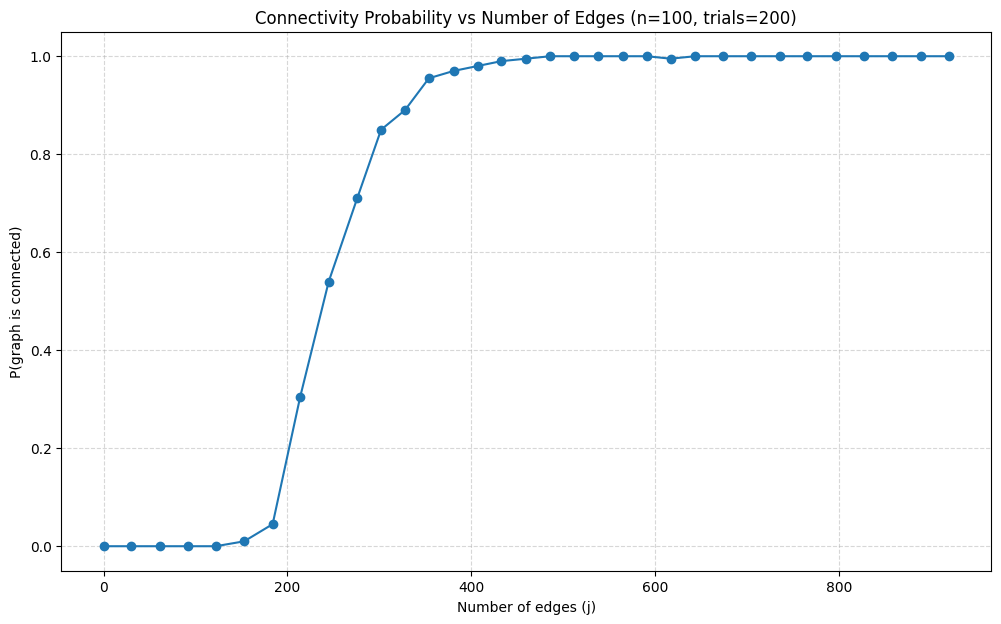

In [15]:
run_connectivity_experiment(n=100, trials=200)